In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [3]:
#name = 'chess.dat'
name = 'mushroom.dat'

dataset = '/content/drive/My Drive/Colab Notebooks/Apriori/' + name

data = pd.read_csv(dataset, sep=' ', header=None)
data.fillna(0,inplace=True)
data=data.astype(int)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,3,9,13,23,25,34,36,38,40,52,54,59,63,67,76,85,86,90,93,98,107,113,0
1,2,3,9,14,23,26,34,36,39,40,52,55,59,63,67,76,85,86,90,93,99,108,114,0
2,2,4,9,15,23,27,34,36,39,41,52,55,59,63,67,76,85,86,90,93,99,108,115,0
3,1,3,10,15,23,25,34,36,38,41,52,54,59,63,67,76,85,86,90,93,98,107,113,0
4,2,3,9,16,24,28,34,37,39,40,53,54,59,63,67,76,85,86,90,94,99,109,114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,7,9,13,24,28,35,36,39,50,52,58,59,63,73,83,85,88,90,93,106,112,119,0
8120,2,3,9,13,24,28,35,36,39,50,52,58,59,63,73,83,85,87,90,93,106,110,119,0
8121,2,6,9,13,24,28,35,36,39,41,52,58,59,63,73,83,85,88,90,93,106,112,119,0
8122,1,7,10,13,24,31,34,36,38,48,53,58,59,66,67,76,85,86,90,94,102,110,119,0


In [4]:
row = len(data)
col = len(data.values[0])
#print(row, col)

In [5]:
records_List = []
for i in range(0, row):
    records_List.append([
                        int(data.values[i,j])
                        for j in range(0, col)
                            if (int(data.values[i,j]) != 0)
                       ])
records_List

[[1,
  3,
  9,
  13,
  23,
  25,
  34,
  36,
  38,
  40,
  52,
  54,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  98,
  107,
  113],
 [2,
  3,
  9,
  14,
  23,
  26,
  34,
  36,
  39,
  40,
  52,
  55,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  99,
  108,
  114],
 [2,
  4,
  9,
  15,
  23,
  27,
  34,
  36,
  39,
  41,
  52,
  55,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  99,
  108,
  115],
 [1,
  3,
  10,
  15,
  23,
  25,
  34,
  36,
  38,
  41,
  52,
  54,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  98,
  107,
  113],
 [2,
  3,
  9,
  16,
  24,
  28,
  34,
  37,
  39,
  40,
  53,
  54,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  94,
  99,
  109,
  114],
 [2,
  3,
  10,
  14,
  23,
  26,
  34,
  36,
  39,
  41,
  52,
  55,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  98,
  108,
  114],
 [2,
  4,
  9,
  15,
  23,
  26,
  34,
  36,
  39,
  42,
  52,
  55,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  98,
  108,
  115],
 [2,
  4,
  10,
  15,
  23,
  27

In [6]:
te = TransactionEncoder()
te_ary = te.fit(records_List).transform(records_List)
dataX = pd.DataFrame(te_ary, columns=te.columns_)
dataX = dataX.astype(int)
dataX

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
8120,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
8121,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
8122,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [7]:
apriori(dataX, min_support=0.8)

,support,itemsets
0,0.974151,(33)
1,0.838503,(35)
2,1.000000,(84)
3,0.975382,(85)
4,0.921713,(89)
5,0.812654,"(33, 35)"
6,0.974151,"(33, 84)"
7,0.973166,"(33, 85)"
8,0.898080,"(89, 33)"
9,0.838503,"(35, 84)"


In [22]:
threshold = 1
total_Time = []
threshold_value = []

for i in range(0,10):
    begin = time.time()
    result = apriori(dataX, min_support=threshold)
    end = time.time()
    total_Time.append(end-begin)
    threshold_value.append(threshold)
    threshold -= 0.1
    print(begin,end)
total_Time
#threshold_value

1632119424.2386496 1632119424.2688203
1632119424.269603 1632119424.298596
1632119424.3000624 1632119424.3312545
1632119424.3313665 1632119424.365149
1632119424.365254 1632119424.3984108
1632119424.39853 1632119424.443154
1632119424.4432712 1632119424.701493
1632119424.7016203 1632119426.1403317
1632119426.1410985 1632119463.3607664
1632119463.3615768 1632120095.4761028


[0.030170679092407227,
 0.028992891311645508,
 0.03119206428527832,
 0.0337824821472168,
 0.0331568717956543,
 0.04462409019470215,
 0.2582218647003174,
 1.438711404800415,
 37.21966791152954,
 632.1145260334015]

In [23]:
print(total_Time)
print(threshold_value)

[0.030170679092407227, 0.028992891311645508, 0.03119206428527832, 0.0337824821472168, 0.0331568717956543, 0.04462409019470215, 0.2582218647003174, 1.438711404800415, 37.21966791152954, 632.1145260334015]
[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]


-->**Mushroom**

[0.03118300437927246, 0.02501201629638672, 0.02875804901123047, 0.033854007720947266, 0.032987356185913086, 0.047569990158081055, 0.22492480278015137, 1.697321891784668, 38.04698634147644, 673.4689807891846]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]

-->**Chess**

[1.6181080341339111, 0.09707427024841309, 1.2204933166503906, 11.597933530807495, 80.61982703208923, 485.0883479118347, 2416.4272072315216]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]

<function matplotlib.pyplot.show>

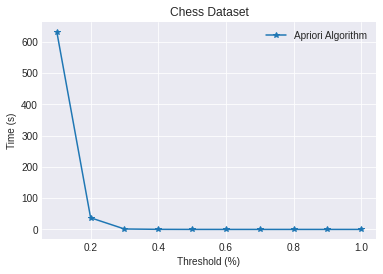

In [24]:
plt.style.use('seaborn-darkgrid')

plt.plot(threshold_value, total_Time, '-*')
plt.title('Chess Dataset')
plt.xlabel('Threshold (%)')
plt.ylabel('Time (s)')
plt.legend(['Apriori Algorithm'], loc='upper right')
plt.savefig('/content/drive/My Drive/Colab Notebooks/Apriori/Chess_apriori.pdf', dpi=300, bbox_inches='tight')
plt.show

In [10]:
#Mushroom
#apM_total_Time = [0.25842881202697754, 0.10440802574157715, 0.1211397647857666, 0.10687017440795898, 0.12969374656677246, 0.1438894271850586, 0.1778252124786377, 0.23185992240905762, 0.5937631130218506, 4.875962972640991]
#apM_threshold_value = [1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]

#Chess
#apC_total_Time = [0.03931140899658203, 0.07153558731079102, 0.2961697578430176, 1.0832898616790771, 4.8713319301605225, 20.427759408950806, 96.04614901542664]
#apC_threshold_value = [1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]

<function matplotlib.pyplot.show>

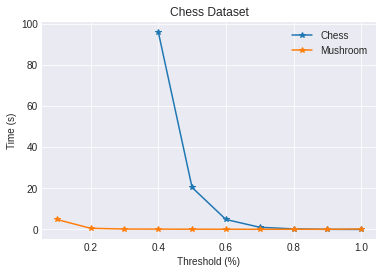

In [ ]:
plt.style.use('seaborn-darkgrid')

plt.plot(apC_threshold_value, apC_total_Time, '-*')
plt.plot(apM_threshold_value, apM_total_Time, '-*')
plt.title('Chess Dataset')
plt.xlabel('Threshold (%)')
plt.ylabel('Time (s)')
plt.legend(['Chess', 'Mushroom'], loc='upper right')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Apriori/Chess_Mushroom_FP-Growth.pdf', dpi=300, bbox_inches='tight')
plt.show